In [3]:
import pandas as pd
df = pd.read_csv("TrainData.csv")
df.head()

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
GRASS,110.0,189.0,9,0.0,0.0,1.000000,0.666667,1.222222,1.186342,12.925926,10.888889,9.222222,18.666668,-6.111111,-11.111111,17.222221,18.666668,0.508139,1.910864
GRASS,86.0,187.0,9,0.0,0.0,1.111111,0.720082,1.444444,0.750309,13.740741,11.666667,10.333334,19.222221,-6.222222,-10.222222,16.444445,19.222221,0.463329,1.941465
GRASS,225.0,244.0,9,0.0,0.0,3.388889,2.195113,3.000000,1.520234,12.259259,10.333334,9.333334,17.111110,-5.777778,-8.777778,14.555555,17.111110,0.480149,1.987902
GRASS,47.0,232.0,9,0.0,0.0,1.277778,1.254621,1.000000,0.894427,12.703704,11.000000,9.000000,18.111110,-5.111111,-11.111111,16.222221,18.111110,0.500966,1.875362
GRASS,97.0,186.0,9,0.0,0.0,1.166667,0.691215,1.166667,1.005540,15.592592,13.888889,11.777778,21.111110,-5.111111,-11.444445,16.555555,21.111110,0.442661,1.863654


In [4]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')

Matplotlib is building the font cache; this may take a moment.


In [5]:
df.shape

(2100, 19)

In [4]:
df["Target"] = df.index
df["Target"] = df["Target"].astype('category')
df.reset_index(drop = True, inplace = True)

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
features = ['REGION-CENTROID-COL',
 'REGION-CENTROID-ROW',
 'REGION-PIXEL-COUNT',
 'SHORT-LINE-DENSITY-5',
 'SHORT-LINE-DENSITY-2',
 'VEDGE-MEAN',
 'VEDGE-SD',
 'HEDGE-MEAN',
 'HEDGE-SD',
 'INTENSITY-MEAN',
 'RAWRED-MEAN',
 'RAWBLUE-MEAN',
 'RAWGREEN-MEAN',
 'EXRED-MEAN',
 'EXBLUE-MEAN',
 'EXGREEN-MEAN',
 'VALUE-MEAN',
 'SATURATION-MEAN',
 'HUE-MEAN']

In [7]:
# Creating feature numpy array
x = df.loc[:, features].values

In [8]:
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [10]:
from sklearn.decomposition import PCA
pca_object = PCA(n_components=19)
principalComponents = pca_object.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents)
principalDf

In [11]:
principalDf = pd.DataFrame(data = principalComponents)
principalDf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-3.065538,-0.619007,2.270508,-0.274774,-0.968620,0.068254,0.677774,-0.069751,-0.223987,-0.102769,-0.041242,0.025303,-0.020963,-0.074620,-3.122054e-08,2.242916e-08,4.086793e-08,8.887093e-09,5.034269e-17
1,-2.957565,-0.576610,2.274977,-0.035729,-1.180553,0.125848,0.545220,-0.069707,-0.088200,-0.115274,0.042913,-0.006196,-0.017808,-0.063594,2.352371e-08,-1.929427e-08,-3.965519e-08,-1.111238e-08,-1.058787e-16
2,-3.118842,0.100534,2.860224,-1.216227,0.283989,0.073598,-0.114089,-0.581909,-0.537175,-0.296551,-0.453744,0.232378,-0.134850,-0.036099,-3.297157e-08,-7.942443e-09,-3.343794e-08,8.242211e-09,2.079282e-15
3,-3.243500,-0.573516,2.369381,0.337915,-1.501262,0.382618,0.236052,-0.349982,-0.371905,0.289807,-0.299052,0.138674,0.081892,-0.065844,-3.957850e-08,4.771145e-09,-1.135537e-08,-1.489421e-08,-1.315505e-17
4,-2.891930,-0.612673,2.326523,-0.135683,-1.087976,0.080673,0.567876,-0.053025,0.047338,-0.111211,-0.068508,0.058028,0.018049,-0.075551,-3.931271e-08,-5.546100e-09,-1.738511e-08,6.074437e-09,-1.404020e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,-1.939786,-0.369204,-0.858516,0.515268,-0.936921,0.222303,-0.436460,-0.068969,0.046252,0.518421,-0.106233,0.035809,0.437894,0.003040,-2.204314e-09,1.858370e-09,-7.383751e-09,-1.323671e-09,2.281231e-18
2096,-1.971407,-0.408190,-0.484813,2.714945,0.469514,-0.372087,-0.056864,-0.208824,0.036095,0.473789,-0.172672,0.169691,0.713218,0.006778,1.198531e-08,1.645925e-09,6.375386e-09,3.553870e-09,4.529630e-18
2097,-1.998508,-0.450277,-0.683671,-0.378072,-0.014727,0.052250,-0.327501,0.065438,-0.080605,0.506531,-0.202625,0.016615,0.412785,0.002163,-1.844603e-08,-4.316633e-09,5.925768e-09,1.580592e-10,3.911598e-19
2098,-1.872852,-0.075825,-0.551204,-0.539273,0.205738,-0.052191,-0.481512,-0.205823,0.095947,0.161894,-0.250237,0.161676,0.346457,0.002965,-2.272809e-08,5.041124e-09,-3.744787e-09,-1.528646e-08,-7.811496e-19


In [12]:
import numpy as np
#The amount of variance that each PC explains
var= pca_object.explained_variance_ratio_
var


var1=np.cumsum(np.round(pca_object.explained_variance_ratio_, decimals=4)*100)
var1

array([4.23423136e-01, 1.60648514e-01, 9.94406270e-02, 5.82205813e-02,
       5.18233715e-02, 5.08489380e-02, 4.10094540e-02, 3.19758201e-02,
       3.05677172e-02, 2.11606912e-02, 1.43749201e-02, 1.02703471e-02,
       6.21828595e-03, 1.75961102e-05, 1.58608347e-16, 1.33637598e-16,
       1.05406803e-16, 9.54337430e-17, 1.15544970e-34])

In [13]:
#Cumulative Variance explains
var1=np.cumsum(np.round(pca_object.explained_variance_ratio_, decimals=4)*100)
var1

array([42.34, 58.4 , 68.34, 74.16, 79.34, 84.42, 88.52, 91.72, 94.78,
       96.9 , 98.34, 99.37, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99,
       99.99])

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=13)
principalComponents = pca.fit_transform(x)


# In[23]:




# In[24]:


#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
var1


array([42.34, 58.4 , 68.34, 74.16, 79.34, 84.42, 88.52, 91.72, 94.78,
       96.9 , 98.34, 99.37, 99.99])

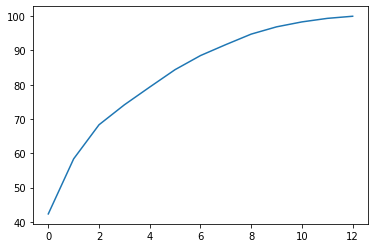

In [14]:
plt.plot(var1)

In [17]:
# Creating Target numpy array
y = df.loc[:,['Target']].values

In [18]:
finalDf = pd.concat([principalDf, df[['Target']]], axis = 1)


# In[28]:


set(finalDf["Target"])


# In[29]:




{'BRICKFACE', 'CEMENT', 'FOLIAGE', 'GRASS', 'PATH', 'SKY', 'WINDOW'}

In [19]:
finalDf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Target
0,-3.065538,-0.619007,2.270508,-0.274774,-0.968620,0.068254,0.677774,-0.069751,-0.223987,-0.102769,-0.041242,0.025303,-0.020963,-0.074620,-3.122054e-08,2.242916e-08,4.086793e-08,8.887093e-09,5.034269e-17,GRASS
1,-2.957565,-0.576610,2.274977,-0.035729,-1.180553,0.125848,0.545220,-0.069707,-0.088200,-0.115274,0.042913,-0.006196,-0.017808,-0.063594,2.352371e-08,-1.929427e-08,-3.965519e-08,-1.111238e-08,-1.058787e-16,GRASS
2,-3.118842,0.100534,2.860224,-1.216227,0.283989,0.073598,-0.114089,-0.581909,-0.537175,-0.296551,-0.453744,0.232378,-0.134850,-0.036099,-3.297157e-08,-7.942443e-09,-3.343794e-08,8.242211e-09,2.079282e-15,GRASS
3,-3.243500,-0.573516,2.369381,0.337915,-1.501262,0.382618,0.236052,-0.349982,-0.371905,0.289807,-0.299052,0.138674,0.081892,-0.065844,-3.957850e-08,4.771145e-09,-1.135537e-08,-1.489421e-08,-1.315505e-17,GRASS
4,-2.891930,-0.612673,2.326523,-0.135683,-1.087976,0.080673,0.567876,-0.053025,0.047338,-0.111211,-0.068508,0.058028,0.018049,-0.075551,-3.931271e-08,-5.546100e-09,-1.738511e-08,6.074437e-09,-1.404020e-17,GRASS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,-1.939786,-0.369204,-0.858516,0.515268,-0.936921,0.222303,-0.436460,-0.068969,0.046252,0.518421,-0.106233,0.035809,0.437894,0.003040,-2.204314e-09,1.858370e-09,-7.383751e-09,-1.323671e-09,2.281231e-18,CEMENT
2096,-1.971407,-0.408190,-0.484813,2.714945,0.469514,-0.372087,-0.056864,-0.208824,0.036095,0.473789,-0.172672,0.169691,0.713218,0.006778,1.198531e-08,1.645925e-09,6.375386e-09,3.553870e-09,4.529630e-18,CEMENT
2097,-1.998508,-0.450277,-0.683671,-0.378072,-0.014727,0.052250,-0.327501,0.065438,-0.080605,0.506531,-0.202625,0.016615,0.412785,0.002163,-1.844603e-08,-4.316633e-09,5.925768e-09,1.580592e-10,3.911598e-19,CEMENT
2098,-1.872852,-0.075825,-0.551204,-0.539273,0.205738,-0.052191,-0.481512,-0.205823,0.095947,0.161894,-0.250237,0.161676,0.346457,0.002965,-2.272809e-08,5.041124e-09,-3.744787e-09,-1.528646e-08,-7.811496e-19,CEMENT
